In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#Hough Line Trnsformation of a Video
cap= cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
if cap.isOpened():
    ret,frame= cap.read()
else:
    ret= False
while ret:
    ret, frame= cap.read()
    grey= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edge= cv2.Canny(grey, 50,250, apertureSize=5, L2gradient= True)
    line= cv2.HoughLines(edge,1,np.pi/180, 200)
    if line is not None:
        for rho, theta in line[0]:
            a= np.cos(theta)
            b= np.sin(theta)
            x0= a*rho
            y0= b*rho
            pt1=(int(x0+ 1000*(-b)),int(y0+ 1000*(-a)))
            pt2=(int(x0- 1000*(-b)),int(y0- 1000*(-a)))
            cv2.line(frame,pt1,pt2,(0,255),1)
            
    cv2.imshow('Video Feed', frame)
    if cv2.waitKey(1)==27:
        break
cv2.destroyAllWindows()
cap.release()

C:\Users\Utkarsh\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
C:\Users\Utkarsh\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


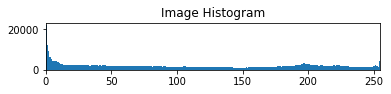

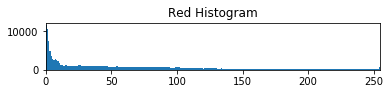

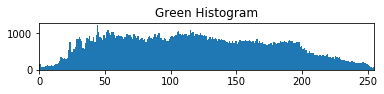

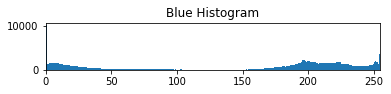

In [12]:
# Color Histograms
img= cv2.imread(r'C:\Users\Utkarsh\Desktop\beautiful_scenery_04_hd_pictures_166258.jpg')
img1= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R, G, B= cv2.split(img1)
# historgram of the image and the colour
plt.subplot(4,1,1)
plt.hist(img1.ravel(),256, [0,255])
plt.title('Image Histogram')
plt.xlim(xmin=0, xmax=255)
plt.show()

plt.subplot(4,1,2)
plt.hist(R.ravel(),256, [0,255])
plt.title('Red Histogram')
plt.xlim(xmin=0, xmax=255)
plt.show()

plt.subplot(4,1,3)
plt.hist(G.ravel(),256, [0,255])
plt.title('Green Histogram')
plt.xlim(xmin=0, xmax=255)
plt.show()

plt.subplot(4,1,4)
plt.hist(B.ravel(),256, [0,255])
plt.title('Blue Histogram')
plt.xlim(xmin=0, xmax=255)
plt.show()

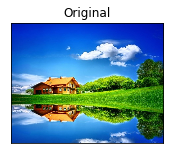

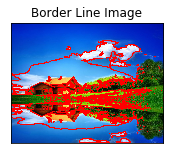

In [17]:
# Border Finding
img= cv2.imread(r'C:\Users\Utkarsh\Desktop\beautiful_scenery_04_hd_pictures_166258.jpg')
ori= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh= cv2.threshold(grey,127,255,0)
img2, contours, hierarchy= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img1, contours,-1,(255,0,0),2)
title=['Original','Border Line Image']
image=[ori, img1]
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(image[i])
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [18]:
#Max RGB Video Feed
cap= cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
if cap.isOpened():
    ret,frame= cap.read()
else:
    ret= False
while ret:
    ret, frame= cap.read()
    (B, G, R)= cv2.split(frame)
    M=np.maximum(np.maximum(B,G),R)
    R[R<M]=0
    G[G<M]=0
    B[B<M]=0
    output= cv2.merge((B,G,R))        
    cv2.imshow('Video Feed', output)
    if cv2.waitKey(1)==27:
        break
cv2.destroyAllWindows()
cap.release()